In [33]:
import pandas as pd
import os
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [34]:
path_raw = os.getenv('PATH_RAW')
df = pd.read_csv('../data/scraped_data.csv', sep=',')
# df = pd.read_csv(path_raw, sep=',')

In [35]:
df_0 = df.copy()

In [36]:
df_0 = df_0.drop_duplicates()
df_0 = df_0.dropna()

df_0 = df_0[df_0['n_quartos'] != '5 ou mais']
df_0 = df_0[df_0['n_banheiros'] != '5 ou mais']
df_0 = df_0[df_0['n_garagens'] != '5 ou mais']

df_0 = df_0[(df_0['find_price'] > 200000) & (df_0['find_price'] < 1000000)]

C:\Users\davim\AppData\Local\Temp\ipykernel_7560\1173680375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['find_price'])


<Axes: xlabel='find_price', ylabel='Density'>

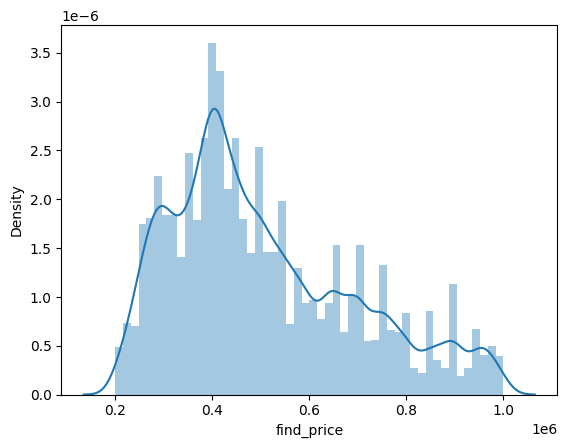

In [37]:
sns.distplot(df_0['find_price'])

In [38]:
df_0['expensive'] = df_0['find_price'].apply(lambda x: 1 if x>400000 else 0)

In [39]:
df_0['expensive'].value_counts(normalize=True)

expensive
1    0.642581
0    0.357419
Name: proportion, dtype: float64

In [40]:
df_0[['Bairro']] = df_0['find_endereco'].str.split(', ', expand=True)[[0]]

In [41]:
df_0 = df_0.drop(['find_anuncio','find_descri','find_loc','find_vendedor','find_endereco','is_ar_condicionado','is_profissional','n_fotos'], axis=1)

In [42]:
df_0.head(1)

,find_condominio,find_iptu,find_m_quadrado,find_price,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive,Bairro
0,R$ 1.100 / mês,R$ 180,105m²,380000,False,True,False,False,False,False,False,False,False,3,0,3,0,Aflitos


In [43]:
# deixando como num a coluna find_condominio
df_0['find_condominio'] = df_0['find_condominio'].astype('str').str.replace('R$', '').str.replace(' / mês', '').str.replace('.', '')

# deixando como num a coluna find_iptu
df_0['find_iptu'] = df_0['find_iptu'].astype('str').str.replace('R$ ', '').str.replace('.', '')

# deixando como num a coluna find_m_quadrado
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('str').str.replace('m²', '').str.replace('.', '')

# cast direto colunas(floats devido a conseguir dar cast em NaN)
df_0['find_condominio'] = df_0['find_condominio'].astype('float')
df_0['find_iptu'] = df_0['find_iptu'].astype('float')
df_0['Bairro'] = df_0['Bairro'].astype('category')
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('float')
df_0['find_price'] = df_0['find_price'].astype('float')
df_0['is_academia'] = df_0['is_academia'].astype('int')
df_0['is_apertamento'] = df_0['is_apertamento'].astype('int')
#df_0['is_ar_condicionado'] = df_0['is_ar_condicionado'].astype('int')
df_0['is_churrasqueira'] = df_0['is_churrasqueira'].astype('int')
df_0['is_elevador'] = df_0['is_elevador'].astype('int')
df_0['is_mobiliado'] = df_0['is_mobiliado'].astype('int')
df_0['is_piscina'] = df_0['is_piscina'].astype('int')
df_0['is_portaria'] = df_0['is_portaria'].astype('int')
#df_0['is_profissional'] = df_0['is_profissional'].astype('int')
df_0['is_salao_festa'] = df_0['is_salao_festa'].astype('int')
df_0['is_varanda'] = df_0['is_varanda'].astype('int')
df_0['n_banheiros'] = df_0['n_banheiros'].astype('int')
#df_0['n_fotos'] = df_0['n_fotos'].astype('int')
df_0['n_garagens'] = df_0['n_garagens'].astype('int')
df_0['n_quartos'] = df_0['n_quartos'].astype('int')

In [44]:
#df_0['Bairro'] = df_0['Bairro'].cat.codes

In [45]:
df_0 = df_0.drop(columns=['find_price'])

In [46]:
list(df_0.columns)

['find_condominio',
 'find_iptu',
 'find_m_quadrado',
 'is_academia',
 'is_apertamento',
 'is_churrasqueira',
 'is_elevador',
 'is_mobiliado',
 'is_piscina',
 'is_portaria',
 'is_salao_festa',
 'is_varanda',
 'n_banheiros',
 'n_garagens',
 'n_quartos',
 'expensive',
 'Bairro']

In [47]:
print(len(df_0))
for col in ['find_condominio', 'find_m_quadrado', 'find_iptu']:
    q1 = df_0[col].quantile(q=0.25)
    q3 = df_0[col].quantile(q=0.75)
    iqr = q3 - q1
    
    df_0 = df_0[(df_0[col] > (q1-1.5*iqr)) & (df_0[col] < (q3+1.5*iqr))]
print(len(df_0))

53461
42662


In [48]:
df_0 = df_0.sample(20000)

In [49]:
df_0.describe()

,find_condominio,find_iptu,find_m_quadrado,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,325.76980,75.747100,67.753650,0.510000,0.986100,0.478150,0.731250,0.066650,0.698350,0.671650,0.675200,0.34390,1.595000,1.227400,2.350050,0.604350
std,416.66655,118.630381,28.384246,0.499912,0.117079,0.499535,0.443321,0.249421,0.458986,0.469625,0.468312,0.47502,0.746326,0.457274,0.780926,0.489002
min,-1.00000,-1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2.000000,0.000000
50%,1.00000,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,2.000000,1.000000
75%,650.00000,147.000000,86.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,3.000000,1.000000
max,1865.00000,570.000000,152.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,4.000000,4.000000,1.000000


In [50]:
df_0.head()

,find_condominio,find_iptu,find_m_quadrado,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive,Bairro
31905,10.0,10.0,82.0,1,1,1,1,1,1,1,1,1,3,2,3,1,Encruzilhada
49850,0.0,0.0,61.0,1,1,1,1,0,1,1,1,0,1,1,2,1,Pina
71893,800.0,0.0,95.0,0,1,0,0,0,0,0,1,0,3,2,3,1,Boa Viagem
18487,1200.0,0.0,107.0,0,1,0,0,0,0,0,0,0,2,1,3,1,Boa Viagem
53752,0.0,0.0,82.0,1,1,0,1,0,1,0,0,1,2,2,4,1,Encruzilhada


In [51]:
!cd

c:\Users\davim\interp-conf-ml\notebooks


In [53]:
df_0.to_csv('../data/to_split.csv')